## Maxwell B-field simulation

https://en.wikipedia.org/wiki/Maxwell_coil

On x-axis:
Maximum B-field: 4.851 G
Central B-field: 4.851 G
Min nonuniformity: 0.0
Max nonuniformity:1.7216622183449878e-06


On y-axis:
Maximum B-field: 4.851 G
Central B-field: 4.851 G
Min nonuniformity: 0.0
Max nonuniformity:1.7216622183449878e-06


On z-axis:
Maximum B-field: 4.851 G
Central B-field: 4.851 G
Min nonuniformity: 0.0
Max nonuniformity:5.311373245029961e-06


Uniform region width with threshold 1e-06: x = 3.654 cm, y = 3.654 cm, z = 3.024 cm


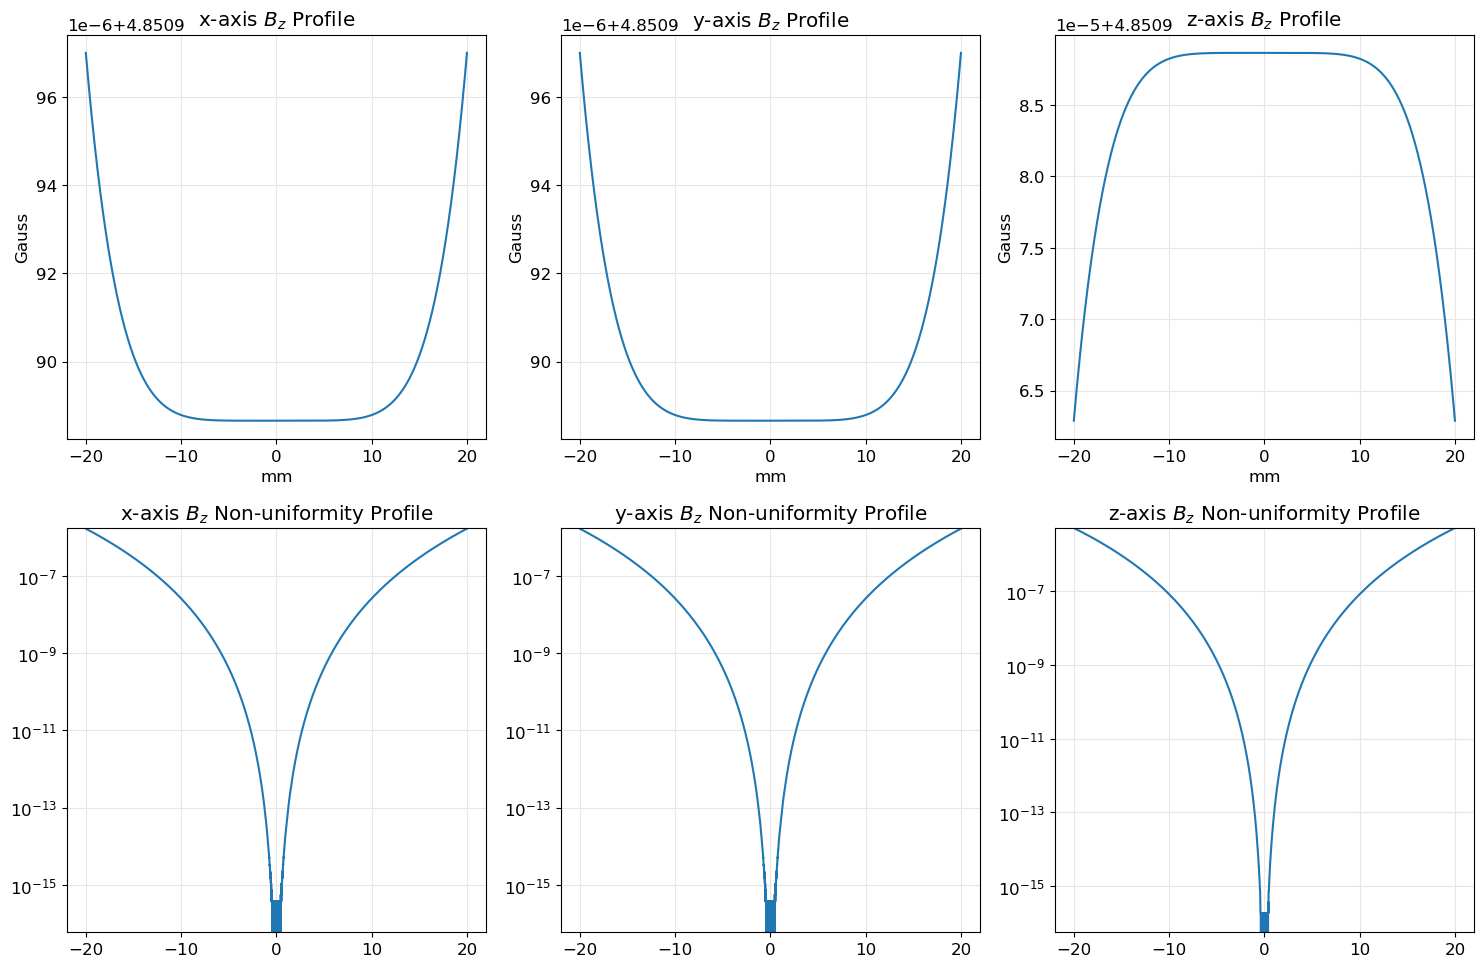

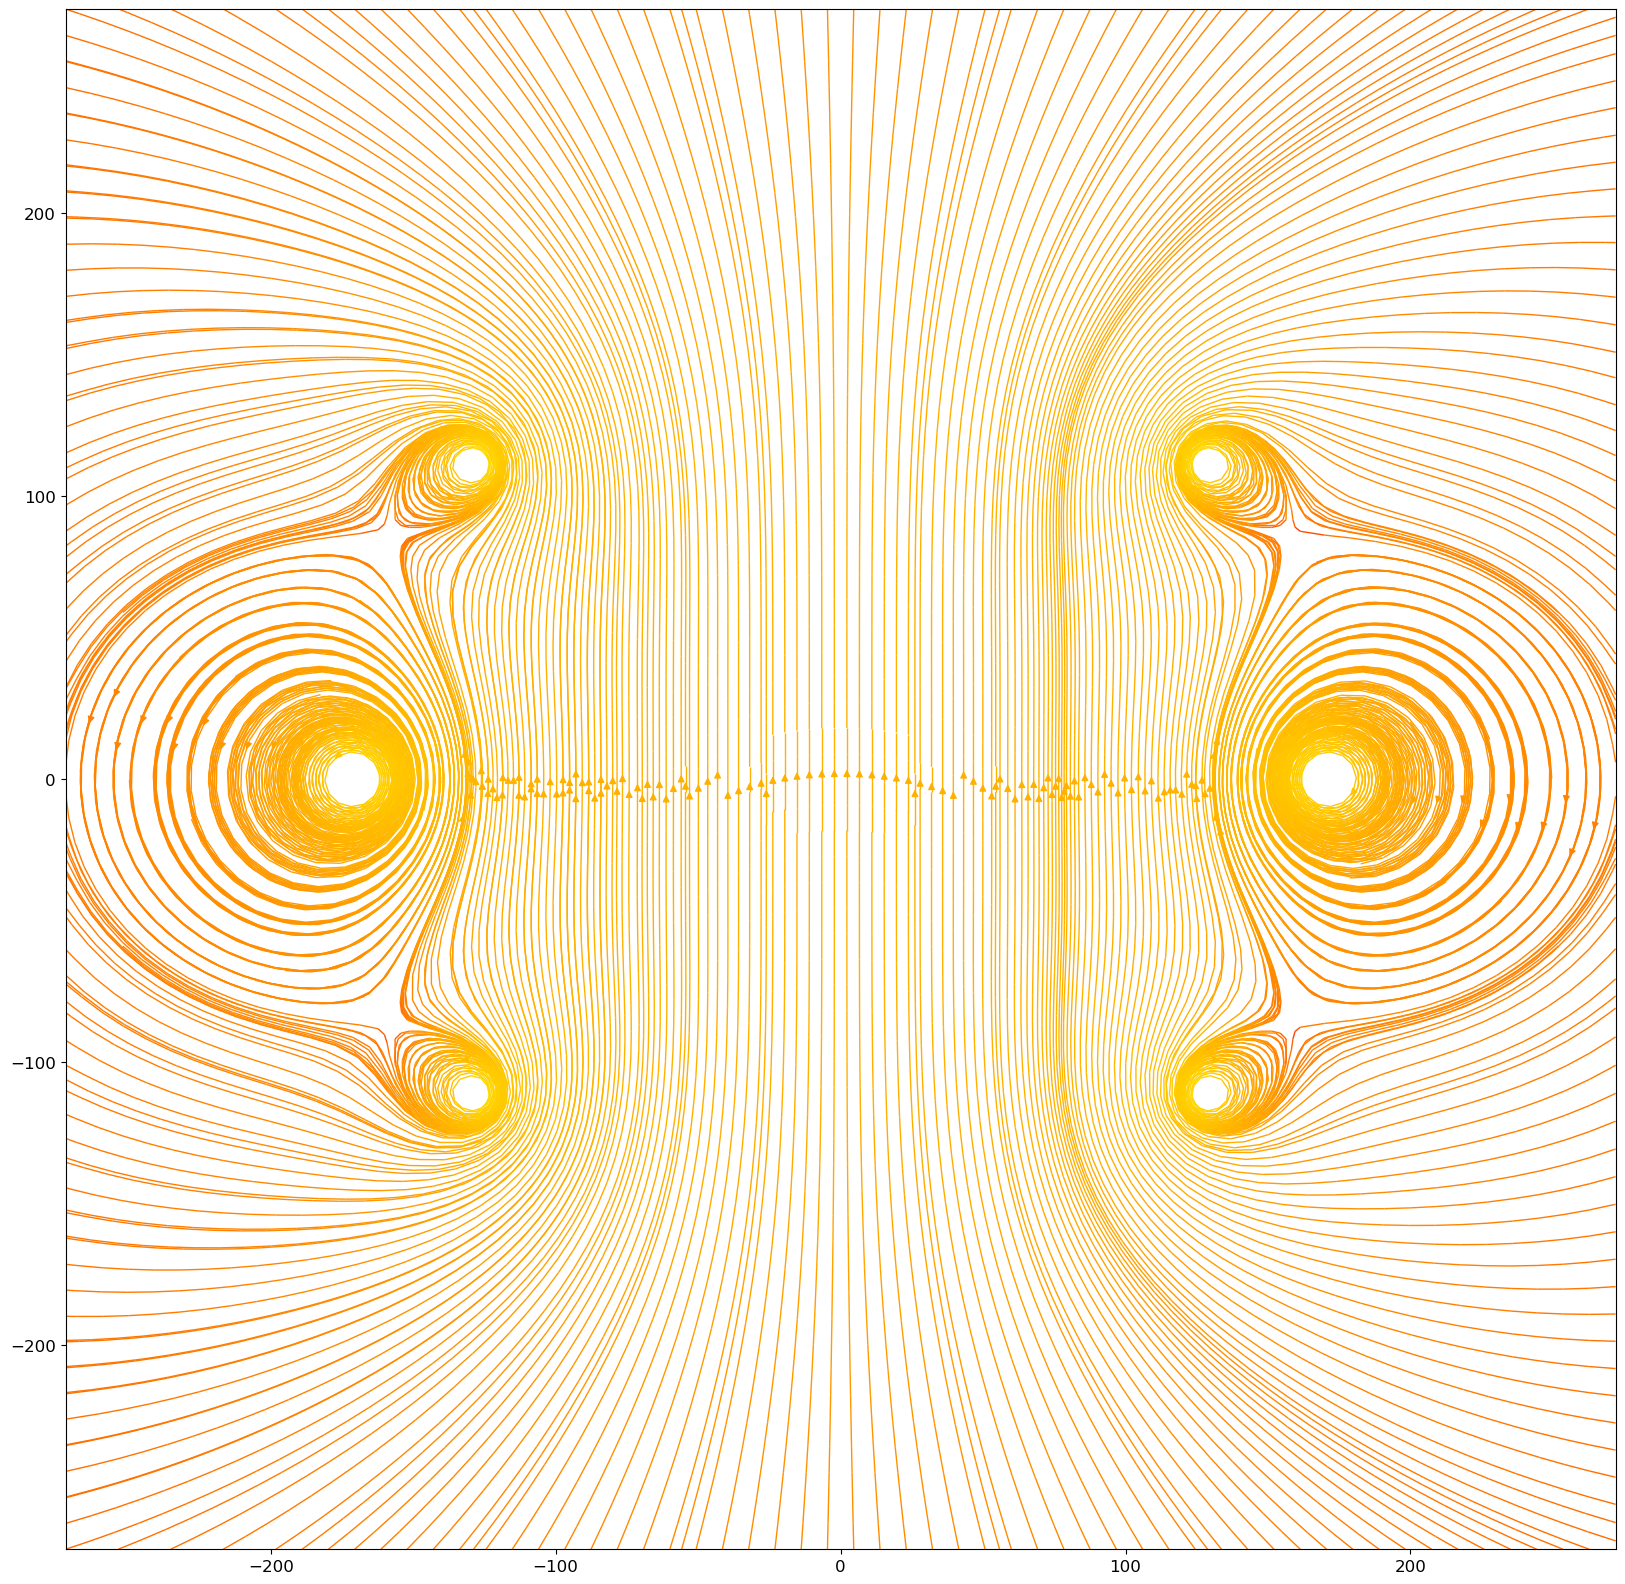

In [7]:
import numpy as np
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream
import magpylib as magpy
from magpylib.magnet import CylinderSegment

magnets = magpy.Collection()
r1 = 170
r2 = np.sqrt(4/7) * r1
a = np.sqrt(3/7) * r1

# ampere turns of smaller coils must be 49/64 that of the central coil
i1 = 70
i2 = 49/64 * i1
winding2up = magpy.current.Loop(
    current=i2,
    diameter=2*r2,
    position=(0,0,a),
)
winding2bot = magpy.current.Loop(
    current=i2,
    diameter=2*r2,
    position=(0,0,-a),
)
winding1 = magpy.current.Loop(
    current=i1,
    diameter=2*r1,
    position=(0,0,0),
)


magnets.add(winding2up).add(winding2bot).add(winding1)


sens_len = 20
get_field_on_axes(magnets, [[-sens_len, sens_len], [-sens_len, sens_len], [-sens_len, sens_len]], True)

b_len = 2*r1*0.8
x_bounds = [-b_len, b_len]
z_bounds = [-b_len, b_len]
make_flux_stream(magnets, x_bounds, z_bounds, [])